<a href="https://colab.research.google.com/github/katemartian/LHoutputsManuscript/blob/master/Fig4_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>Fig4 stats

This notebook contains statistical analysis of the data from the figure 4.

# Install libraries

Install necessary libraries to run statistical tests in R.

In [ ]:
# Use R in Jupyter Notebook
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("readxl")
install.packages("dplyr")

install.packages("ggplot2")

install.packages("nlme")
install.packages("multcomp")

In [ ]:
%%R
library("readxl")
library("dplyr")

library("ggplot2")

library("nlme")
library("multcomp")

And run function at the end of the notebook.

# Directory

Set directory with the source data. Mount disk if you use Google Colab.

In [ ]:
# Mount disk if you use Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change directory
%cd /content/drive/MyDrive/!lab/Manuscripts/LHoutputs/sourcedata

/content/drive/MyDrive/!lab/Manuscripts/LHoutputs/sourcedata


# Learning avoidance task Fig4B

In [ ]:
%%R
df <- read_excel("fig4_LH_avoidanceTask.xlsx", sheet = "learningTask")
df$training = as.factor(df$training)
df$number = as.numeric(df$number)
df$latency = as.numeric(df$latency)

In [ ]:
%%R
wilcox.test(number ~ training, data=df)


	Wilcoxon rank sum test with continuity correction

data:  number by training
W = 0, p-value = 0.002335
alternative hypothesis: true location shift is not equal to 0



In [ ]:
%%R
wilcox.test(latency ~ training, data=df)


	Wilcoxon rank sum exact test

data:  latency by training
W = 48, p-value = 0.000666
alternative hypothesis: true location shift is not equal to 0



# CS Fig4C

In [ ]:
%%R
early <- read_excel("fig4_LH_avoidanceTask.xlsx", sheet="earlyTr_CS-escape")
early$output = as.factor(early$output)
early$period = as.factor(early$period)
early$auc = as.numeric(early$auc)

In [ ]:
%%R
neworder <- c('baseline','CS','crossed')
early <- arrange(transform(early, period=factor(period,levels=neworder)),period)
early$period <- factor(early$period, labels=c('baseline','CS','crossed'))

In [ ]:
%%R
late <- read_excel("fig4_LH_avoidanceTask.xlsx", sheet="lateTr_CS-escape")
late$output = as.factor(late$output)
late$period = as.factor(late$period)
late$auc = as.numeric(late$auc)

In [ ]:
%%R
neworder <- c('baseline','CS','crossed')
late <- arrange(transform(late, period=factor(period,levels=neworder)),period)
late$period <- factor(late$period, labels=c('baseline','CS','crossed'))

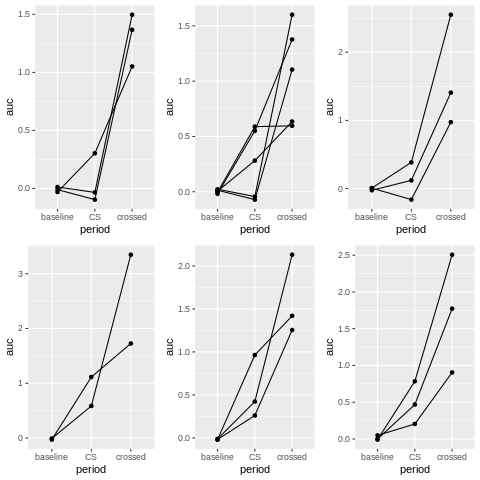

In [ ]:
%%R
p1 <- ggplot(early[(early$output=="LHA-DRN"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse))
p2 <- ggplot(late[(late$output=="LHA-DRN"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse))
p3 <- ggplot(early[(early$output=="LHA-VTA"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse))
p4 <- ggplot(late[(late$output=="LHA-VTA"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse))
p5 <- ggplot(early[(early$output=="LHA-LHb"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse))
p6 <- ggplot(late[(late$output=="LHA-LHb"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse))
multiplot(p1,p2,p3,p4,p5,p6, cols=3)

$n \le 5$

Repeated measures ANOVA on ranks with Dunnett poshoc analysis

In [ ]:
%%R
early["training"] = "early"
late["training"] = "late"
df <- rbind(early,late)
anova <- aov(rank(auc) ~ training*output*period, random=~1|mouse, data=df)
summary(anova)

                       Df Sum Sq Mean Sq F value  Pr(>F)    
training                1    570     570   7.314 0.01009 *  
output                  2     18       9   0.117 0.89030    
period                  2  10543    5271  67.630 2.1e-13 ***
training:output         2    120      60   0.767 0.47108    
training:period         2    813     407   5.218 0.00981 ** 
output:period           4    123      31   0.395 0.81082    
training:output:period  4    201      50   0.644 0.63428    
Residuals              39   3040      78                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


No difference by factor output

In [ ]:
# Early training
%%R
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data=early)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(auc) ~ period, data = early, random = ~1 | 
    mouse)

Linear Hypotheses:
                        Estimate Std. Error z value Pr(>|z|)    
CS - baseline == 0          1.00       2.45   0.408    0.886    
crossed - baseline == 0    17.00       2.45   6.940   <1e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



In [ ]:
# Late training
%%R
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data=late)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(auc) ~ period, data = late, random = ~1 | 
    mouse)

Linear Hypotheses:
                        Estimate Std. Error z value Pr(>|z|)    
CS - baseline == 0          8.25       1.31   6.297 6.08e-10 ***
crossed - baseline == 0    15.75       1.31  12.021  < 1e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



Including factor output

In [ ]:
# Early training
%%R
print('----------------------LHA-DRN----------------------')
drn = early[early$output=='LHA-DRN',]
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data=drn)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

print('----------------------LHA-VTA----------------------')
vta = early[early$output=='LHA-VTA',]
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data=vta)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

print('----------------------LHA-LHb----------------------')
lhb = early[early$output=='LHA-LHb',]
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data = lhb)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

[1] "----------------------LHA-DRN----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(auc) ~ period, data = drn, random = ~1 | 
    mouse)

Linear Hypotheses:
                        Estimate Std. Error z value Pr(>|z|)   
CS - baseline == 0        -1.000      1.414  -0.707  0.70129   
crossed - baseline == 0    4.000      1.414   2.828  0.00901 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)

[1] "----------------------LHA-VTA----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(auc) ~ period, data = vta, random = ~1 | 
    mouse)

Linear Hypotheses:
                        Estimate Std. Error z value Pr(>|z|)    
CS - baseline == 0         1.000      1.732   0.577    0.787    
crossed - baseline == 0    8.

In [ ]:
# Late training
%%R
print('----------------------LHA-DRN----------------------')
drn = late[late$output=='LHA-DRN',]
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data=drn)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

print('----------------------LHA-VTA----------------------')
vta = late[late$output=='LHA-VTA',]
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data=vta)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

print('----------------------LHA-LHb----------------------')
lhb = late[late$output=='LHA-LHb',]
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data = lhb)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

[1] "----------------------LHA-DRN----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(auc) ~ period, data = drn, random = ~1 | 
    mouse)

Linear Hypotheses:
                        Estimate Std. Error z value Pr(>|z|)    
CS - baseline == 0        2.0000     0.7071   2.828  0.00901 ** 
crossed - baseline == 0   4.0000     0.7071   5.657 3.08e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)

[1] "----------------------LHA-VTA----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(auc) ~ period, data = vta, random = ~1 | 
    mouse)

Linear Hypotheses:
                        Estimate Std. Error z value Pr(>|z|)    
CS - baseline == 0        3.0000     0.7454   4.025 0.000113 ***
crossed - baseline == 0   

Mobile score

In [ ]:
%%R
early <- read_excel("fig4_LH_avoidanceTask.xlsx", sheet="earlyTr_CS-escape_mobileScore")
early$period = as.factor(early$period)
early$auc = as.numeric(early$auc)

In [ ]:
%%R
neworder <- c('baseline','CS','crossed')
early <- arrange(transform(early, period=factor(period,levels=neworder)),period)
early$period <- factor(early$period, labels=c('baseline','CS','crossed'))

In [ ]:
%%R
late <- read_excel("fig4_LH_avoidanceTask.xlsx", sheet="lateTr_CS-escape_mobileScore")
late$period = as.factor(late$period)
late$auc = as.numeric(late$auc)

In [ ]:
%%R
neworder <- c('baseline','CS','crossed')
late <- arrange(transform(late, period=factor(period,levels=neworder)),period)
late$period <- factor(late$period, labels=c('baseline','CS','crossed'))

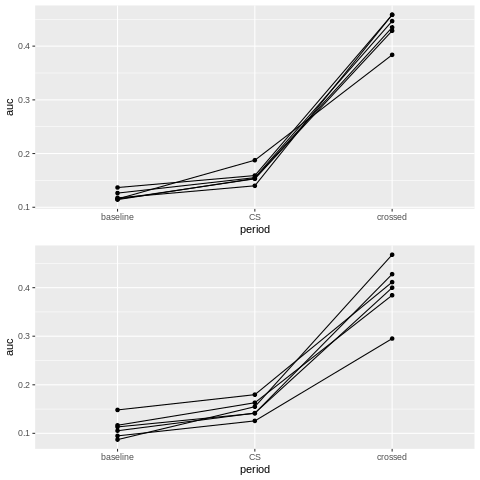

In [ ]:
%%R
p1 <- ggplot(early, aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse))
p2 <- ggplot(late, aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse))
multiplot(p1,p2)

In [ ]:
%%R
print(c("early Training baseline", shapiro.test(early[(early$period=="baseline"), ]$auc)$p.value))
print(c("early Training CS", shapiro.test(early[(early$period=="CS"),]$auc)$p.value))
print(c("early Training crossed", shapiro.test(early[(early$period=="crossed"),]$auc)$p.value))
print("")
print(c("late Training baseline", shapiro.test(late[(late$period=="baseline"),]$auc)$p.value))
print(c("late Training CS", shapiro.test(late[(late$period=="CS"),]$auc)$p.value))
print(c("late Training crossed", shapiro.test(late[(late$period=="crossed"),]$auc)$p.value))

[1] "early Training baseline" "0.0506049305150441"     
[1] "early Training CS" "0.129180086223467"
[1] "early Training crossed" "0.146805405074845"     
[1] ""
[1] "late Training baseline" "0.581704548226573"     
[1] "late Training CS"  "0.939045679306196"
[1] "late Training crossed" "0.530565204855779"    


Repeated measures ANOVA with Dunnett poshoc analysis

In [ ]:
%%R
early["training"] = "early"
late["training"] = "late"
df <- rbind(early,late)
anova <- aov(auc ~ training*period, random=~1|mouse, data=df)
summary(anova)

                Df Sum Sq Mean Sq F value Pr(>F)    
training         1 0.0030  0.0030   3.379 0.0759 .  
period           2 0.6414  0.3207 365.027 <2e-16 ***
training:period  2 0.0017  0.0008   0.955 0.3963    
Residuals       30 0.0264  0.0009                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
# Early training 
%%R
lme.model <- lme(auc ~ period, random=~1|mouse, data=early)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = auc ~ period, data = early, random = ~1 | 
    mouse)

Linear Hypotheses:
                        Estimate Std. Error z value Pr(>|z|)    
CS - baseline == 0       0.03714    0.01110   3.345  0.00161 ** 
crossed - baseline == 0  0.31416    0.01110  28.295  < 1e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



In [ ]:
# Late training
%%R
lme.model <- lme(auc ~ period, random=~1|mouse, data=late)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = auc ~ period, data = late, random = ~1 | 
    mouse)

Linear Hypotheses:
                        Estimate Std. Error z value Pr(>|z|)    
CS - baseline == 0       0.04011    0.01889   2.123   0.0621 .  
crossed - baseline == 0  0.28680    0.01889  15.180   <1e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



# Avoidance mobility onset Fig4D

In [ ]:
%%R
df <- read_excel("fig4_LH_avoidanceTask.xlsx", sheet="avoidance")
df$output = as.factor(df$output)
df$period = as.factor(df$period)
df$auc = as.numeric(df$auc)

In [ ]:
%%R
neworder <- c('immobile','preonset','onset','mobile')
df <- arrange(transform(df, period=factor(period,levels=neworder)),period)
df$period <- factor(df$period, labels=c('immobile','preonset','onset','mobile'))

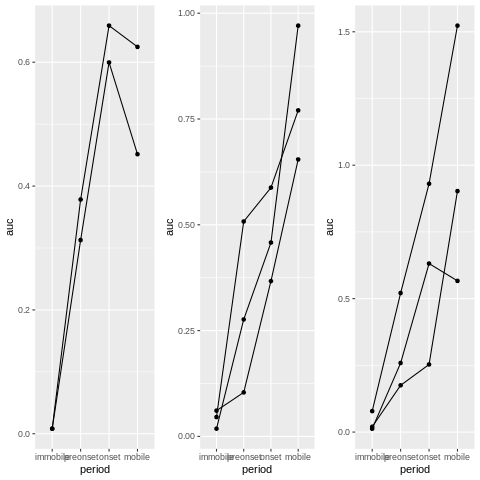

In [ ]:
%%R
p1 <- ggplot(df[(df$output=="LHA-DRN"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse))
p2 <- ggplot(df[(df$output=="LHA-VTA"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse))
p3 <- ggplot(df[(df$output=="LHA-LHb"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse))
multiplot(p1,p2,p3, cols=3)

$n<5$

Repeated measures ANOVA on ranks with Dunnett poshoc analysis

In [ ]:
%%R
anova <- aov(rank(auc) ~ output*period, random=~1|mouse, data=df)
summary(anova)

              Df Sum Sq Mean Sq F value   Pr(>F)    
output         2   13.3     6.7   0.293    0.749    
period         3 2109.3   703.1  30.905 1.05e-07 ***
output:period  6  150.4    25.1   1.102    0.395    
Residuals     20  455.0    22.8                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


No difference by factor output

In [ ]:
%%R
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data=df)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(auc) ~ period, data = df, random = ~1 | 
    mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
preonset - immobile == 0    9.625      2.026   4.750   <1e-05 ***
onset - immobile == 0      16.875      2.026   8.329   <1e-05 ***
mobile - immobile == 0     21.500      2.026  10.611   <1e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



Including factor output

In [ ]:
%%R
print('----------------------LHA-DRN----------------------')
drn = df[df$output=='LHA-DRN',]
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data=drn)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

print('----------------------LHA-VTA----------------------')
vta = df[df$output=='LHA-VTA',]
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data=vta)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

print('----------------------LHA-LHb----------------------')
lhb = df[df$output=='LHA-LHb',]
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data = lhb)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

[1] "----------------------LHA-DRN----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(auc) ~ period, data = drn, random = ~1 | 
    mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
preonset - immobile == 0   2.0000     0.4082   4.899 2.38e-06 ***
onset - immobile == 0      5.5000     0.4082  13.472  < 1e-06 ***
mobile - immobile == 0     4.5000     0.4082  11.023  < 1e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)

[1] "----------------------LHA-VTA----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(auc) ~ period, data = vta, random = ~1 | 
    mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
preonset - immobile =

Mobile score

In [ ]:
%%R
df <- read_excel("fig4_LH_avoidanceTask.xlsx", sheet="avoidance_mobileScore")
df$period = as.factor(df$period)
df$auc = as.numeric(df$auc)

In [ ]:
%%R
neworder <- c('immobile','preonset','onset','mobile')
df <- arrange(transform(df, period=factor(period,levels=neworder)),period)
df$period <- factor(df$period, labels=c('immobile','preonset','onset','mobile'))

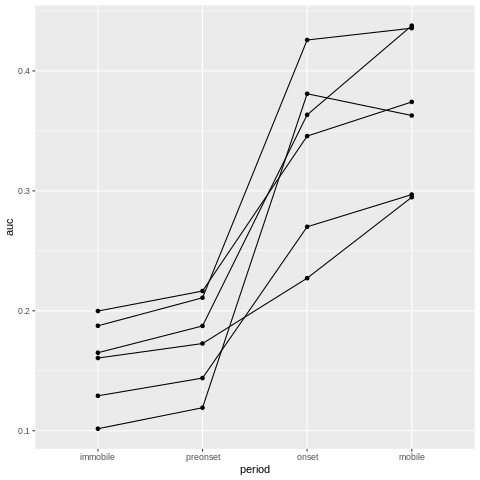

In [ ]:
%%R
ggplot(df, aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse))

Normality test

In [ ]:
%%R
print(c("immobile", shapiro.test(df[(df$period=="immobile"), ]$auc)$p.value))
print(c("preonset", shapiro.test(df[(df$period=="preonset"),]$auc)$p.value))
print(c("onset", shapiro.test(df[(df$period=="onset"),]$auc)$p.value))
print(c("mobile", shapiro.test(df[(df$period=="mobile"),]$auc)$p.value))

[1] "immobile"          "0.782761349762765"
[1] "preonset"          "0.679898340606618"
[1] "onset"            "0.72992559885069"
[1] "mobile"            "0.240420804906177"


Repeated measures ANOVA on ranks with Dunnett poshoc analysis

In [ ]:
%%R
lme.model <- lme(auc ~ period, random=~1|mouse, data=df)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = auc ~ period, data = df, random = ~1 | mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
preonset - immobile == 0  0.01779    0.02282   0.780    0.775    
onset - immobile == 0     0.17822    0.02282   7.810   <1e-04 ***
mobile - immobile == 0    0.20969    0.02282   9.189   <1e-04 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



# Functions

In [ ]:
%%R
# Multiple plot function
#
# ggplot objects can be passed in ..., or to plotlist (as a list of ggplot objects)
# - cols:   Number of columns in layout
# - layout: A matrix specifying the layout. If present, 'cols' is ignored.
#
# If the layout is something like matrix(c(1,2,3,3), nrow=2, byrow=TRUE),
# then plot 1 will go in the upper left, 2 will go in the upper right, and
# 3 will go all the way across the bottom.
#
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}